In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from copy import copy
sns.set()

import os

directory = os.fsencode("data")

   iteration agent_type  unique_id  time_spent
0          0        Car          7         278
1          0        Car          8         281
2          0        Car         17         274
3          0        Car         18         277
4          0        Car         26         268


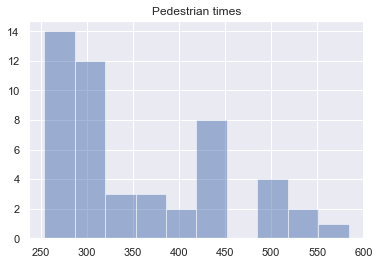

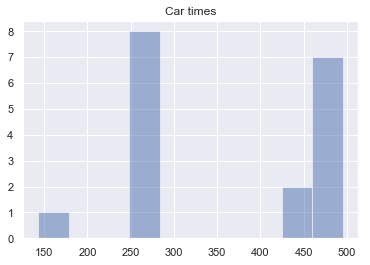

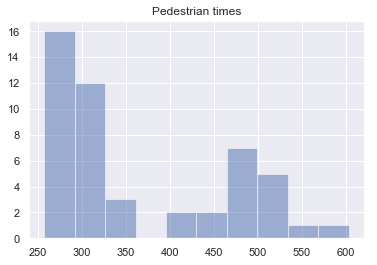

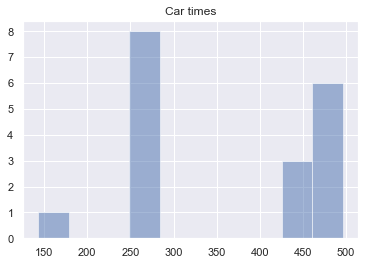

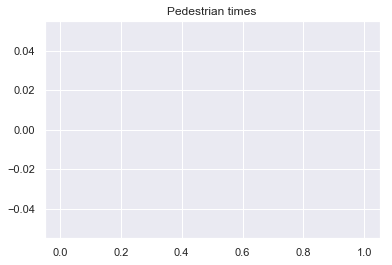

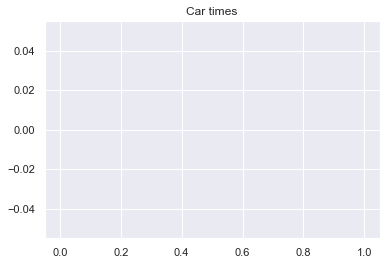

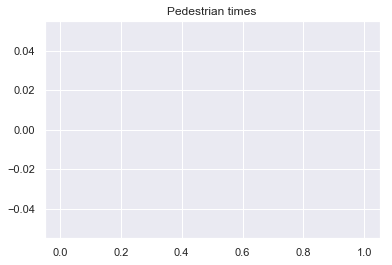

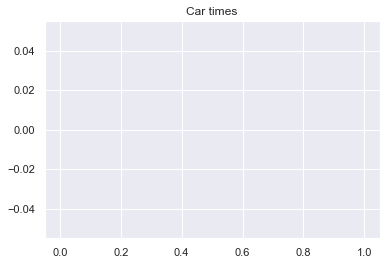

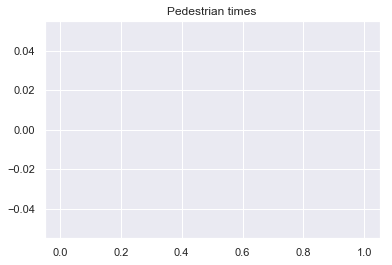

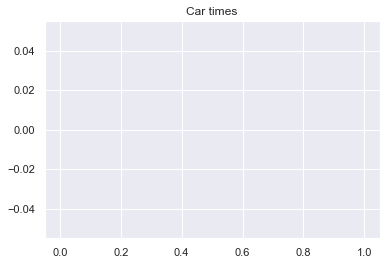

   iteration agent_type  unique_id  time_spent
0          0        Car          7         278
1          0        Car          8         281
2          0        Car         13         274
3          0        Car         14         277
4          0        Car         20         268


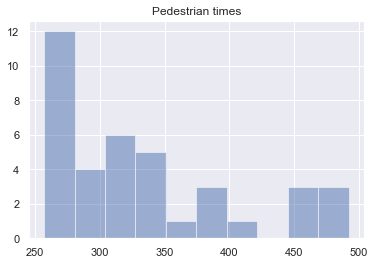

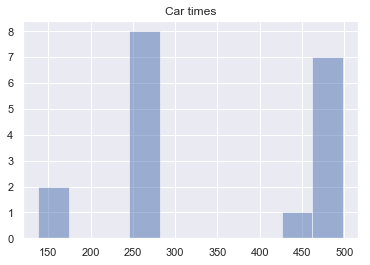

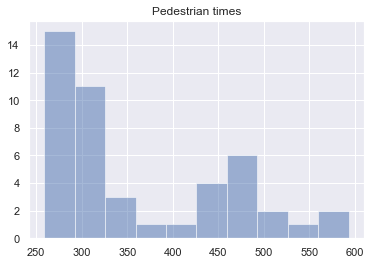

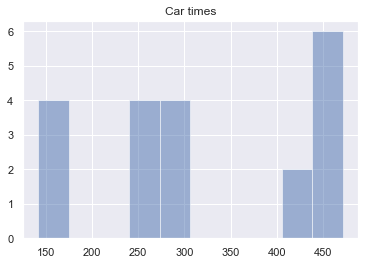

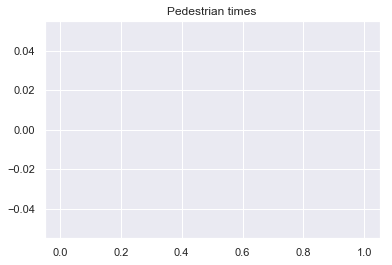

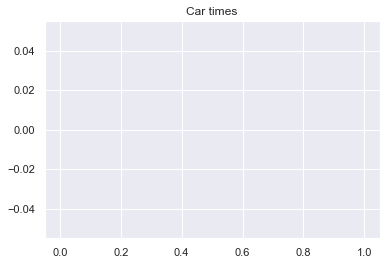

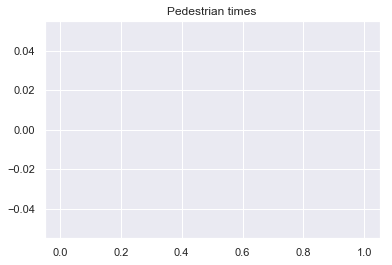

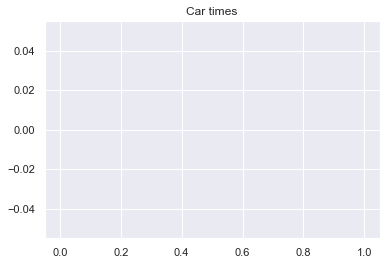

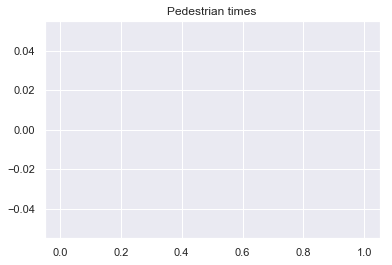

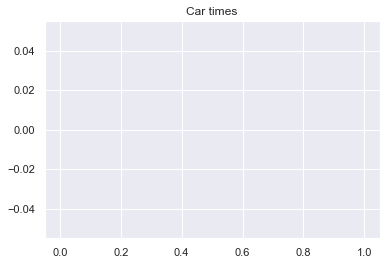

In [2]:
# make a list of lists with histogram information
peds_hists = []
cars_hists = []

if directory:

    for file in os.listdir(directory):
        filename = os.fsdecode(file)

        if filename.startswith("hist"):
            df = pd.read_csv("data/" + filename, header=4)
            
            print(df.head())
            for i in range(5):
                df_sim = df[df['iteration'] == i]
                peds = df_sim[df_sim['agent_type'] == "Pedestrian"]
                cars = df_sim[df_sim['agent_type'] == "Car"]
                plt.title('Pedestrian times')
                plt.hist(peds['time_spent'], alpha=0.5)
                plt.show()
                plt.title('Car times')
                plt.hist(cars['time_spent'], alpha=0.5)
                plt.show()
            

In [3]:
for pedes_times in peds_hists:
    plt.figure(figsize=(5,2))
    plt.xlabel("Time")
    plt.ylabel("Frequention")
    plt.hist(pedes_times, bins = 50)
    plt.show()

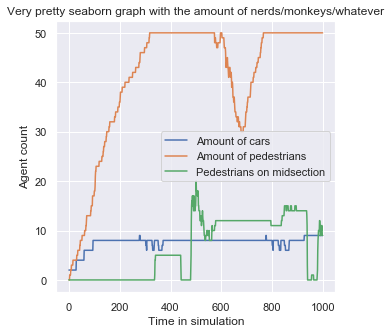

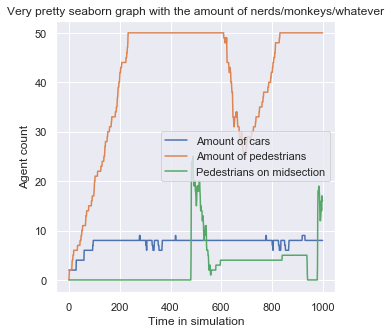

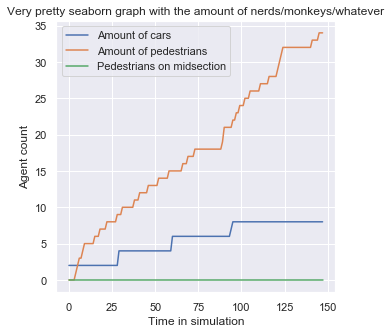

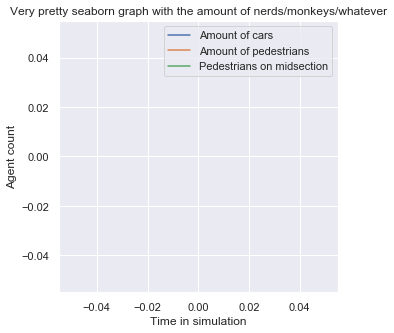

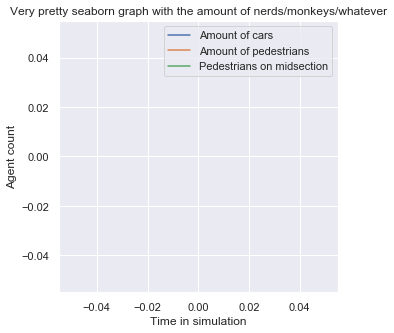

In [4]:
if directory:

    for file in os.listdir(directory):
        filename = os.fsdecode(file)

        if filename.startswith("info"):
                        
            df = pd.read_csv("data/" + filename, header=4)

for i in range(5):
    plt.figure(figsize=(5,5))
    plt.title("Very pretty seaborn graph with the amount of nerds/monkeys/whatever")
    plt.ylabel("Agent count")
    plt.xlabel("Time in simulation")

    df_sim = df[df['iteration'] == i]

    plt.plot(range(len(df_sim['car_count'])), df_sim['car_count'], label="Amount of cars")
    plt.plot(range(len(df_sim['car_count'])), df_sim['pedestrian_count'], label="Amount of pedestrians")
    plt.plot(range(len(df_sim['car_count'])), df_sim['mid_section_count'], label="Pedestrians on midsection")
    plt.legend()
    plt.show()
            
            


In [10]:
df = pd.read_csv("data/info_2019-01-31_15-45-07.csv", header=4)
print(df.head())

   iteration  pedestrian_count  car_count  mid_section_count  \
0          0                 0          2                  0   
1          0                 0          2                  0   
2          0                 1          2                  0   
3          0                 2          2                  0   
4          0                 2          2                  0   

   pedestrians_left  cars_left  
0                 0          0  
1                 0          0  
2                 0          0  
3                 0          0  
4                 0          0  


In [30]:
print(len(df))

2000


In [39]:
sim_list = []
for i in range(2):
    df_sim = df[df['iteration'] == i]
    ped_list = []
    for i in df_sim['pedestrians_left']:
        ped_list.append(i)
    sim_list.append(ped_list)

In [40]:
len(sim_list)

2

In [41]:
len(sim_list[0])

1000

In [55]:
sum(sim_list[0])

49

In [56]:
sum(sim_list[1])

49

In [59]:
batchMeans = []
for simulation in sim_list:
    batchMeans.append(createBatchData(0, 100, simulation))

# we need to do more than 1 simulation right?
accCheck(batchMeans, 2)

(4.498799839957319, [-0.1714411921579086, 0.2694411921579086])

In [49]:
batchMeans

[[(0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.14285714285714285, 0.3499271061118826),
  (0.0, 0.0),
  (0.14285714285714285, 0.34992710611188266),
  (0.14285714285714285, 0.3499271061118826),
  (0.14285714285714285, 0.3499271061118826),
  (0.2857142857142857, 0.6998542122

In [9]:


# ratio of unobserved data/total data
def createBatchData(ratio, amount, data):
    period = int(len(data) / amount)
#     print(period)
    intervalSize = int((ratio) * period)
#     print(period, intervalSize)
    dataBatchArray = []
    currentIndex = 0
    
    # Benedict, is that you?
    currentBatch = []

    for sample in data:

        if currentIndex >= intervalSize and currentIndex < period:
#             print(sample)
            currentBatch.append(sample)
            currentIndex = currentIndex + 1
            
            if currentIndex >= period:
                dataBatchArray.append((np.mean(currentBatch), np.std(currentBatch)))
                currentBatch = []
                currentIndex = 0
        else:
            currentIndex = currentIndex + 1
            

    return dataBatchArray

def accCheck(data, sample_size):
    
    means = []
    # calculate means for each batch -> then for each simulation
    for i in data:
        tempMeans = []
        for j in i:
            tempMeans.append(j[0])
        means.append(tempMeans)

    # total mean
    stds = np.std(means)
    means = np.mean(means)

    Za = 1.96
    # Get confidence bounds (mean +- z*S/sqrt(n))
    confidence = [means-Za*(stds/sample_size**.5), means+Za*(stds/sample_size**.5)]

    # Get accuracy (Z*sqrt(mean(1-mean)))/sqrt(n)
    accuracy = (Za*stds) / (sample_size **.5 * means)
    return accuracy, confidence 

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
970    0
971    0
972    0
973    0
974    0
975    0
976    0
977    0
978    0
979    0
980    0
981    0
982    0
983    0
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Name: pedestrians_left, Length: 1000, dtype: int64
1000    0
1001    0
1002    0
1003    0
1004    0
1005    0
1006    0
1007    0
1008    0
1009    0
1010    0
1011    0
1012    0
1013    0
1014    0
1015    0
1016    0
1017    0
1018    0
1019    0
1020    0
1021    0
1022    0
1023    0
1024    0
1025    0
1026    0
1027    0
1028    0
1029    0
       ..
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0


In [ ]:
batchMeans = createBatchData(0.3, 30, carsTimes)

# we need to do more than 1 simulation right?
accCheck(batchMeans, 750)

In [ ]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [ ]:
import random
max([random.gauss(.134, .0342**2) for i in range(10000000)])

In [ ]:
print(max([random.gauss(.5, .3) for i in range(1000000)]))
print(min([random.gauss(.5, .3) for i in range(1000000)]))

In [ ]:
import matplotlib.pyplot as plt
plt.hist([max(0, min(1, random.gauss(0.5, 0.15))) for i in range(5000000)], bins = 30)
plt.show()

In [ ]:
import numpy as np
import math
1 / (1 + np.exp(10 - 0.25 * math.inf))

In [ ]:
neighbours = []
direction = 1
for i in range(16):
            neighbours.append(20 + ((-direction * 8) + i * (2.5 * 2)) * direction)
print(neighbours)

In [ ]:
neighbours = []
direction = -1
for i in range(16):
            neighbours.append(4 + ((-direction * 8) + i * (2.5 * 2)))
print(neighbours)

In [ ]:
neighbours = []
center = 8
for i in range(16):
    neighbours.append(50 + center - i * 2.5 * 2)
print(neighbours)

In [ ]:
neighbours = []
center = 8
for i in range(16):
    neighbours.append(20 - center + i * 2.5 * 2)
print(neighbours)